In [1]:
from pycaret.anomaly import *
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import time as time
import seaborn as sns
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from pandas import set_option
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('display.width', 500)
#set_option('precision', 3)
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from boruta import BorutaPy
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.preprocessing import binarize,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV ,calibration_curve
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.combine import SMOTEENN
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN,SMOTENC
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,RandomUnderSampler,TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.metrics import classification_report_imbalanced,geometric_mean_score,sensitivity_score,specificity_score
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier,EasyEnsembleClassifier,RUSBoostClassifier
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import SCORERS
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from scipy import stats
from scipy.stats import norm
from numpy import mean
from numpy import std
from scipy import stats
import numpy as np
from imblearn.metrics import sensitivity_score,specificity_score
import matplotlib as mlt
mlt.rcParams['figure.dpi'] = 350

sns.set_style(style='dark')
%matplotlib inline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,average_precision_score
from pycaret.classification import load_model
import warnings
warnings.filterwarnings("ignore")



### About Dataset

# Lung cancer prediction
Lung cancer is the leading cause of cancer deaths worldwide.<br>
<br>
People who smoke have the greatest risk of lung cancer, though lung cancer can also occur in people who have never smoked. The risk of lung cancer increases with the length of time and number of cigarettes someone's smoked. If someone quits smoking, even after smoking for many years, he/she can significantly reduce the chances of developing lung cancer.
</p> 

**The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status.**

### Attribute information:
Total no. of attributes: **16** <br>
No .of instances:       **284**

01. **Gender**: M(male), F(female)
02. **Age**: Age of the patient
03. **Smoking**: YES=2 , NO=1.
04. **Yellow fingers**: YES=2 , NO=1.
05. **Anxiety**: YES=2 , NO=1.
06. **Peer_pressure**: YES=2 , NO=1.
07. **Chronic Disease**: YES=2 , NO=1.
08. **Fatigue**: YES=2 , NO=1.
09. **Allergy**: YES=2 , NO=1.
10. **Wheezing**: YES=2 , NO=1.
11. **Alcohol**: YES=2 , NO=1.
12. **Coughing**: YES=2 , NO=1.
13. **Shortness of Breath**: YES=2 , NO=1.
14. **Swallowing Difficulty**: YES=2 , NO=1.
15. **Chest pain**: YES=2 , NO=1.
16. **Lung Cancer**: YES , NO.

In [2]:
df = pd.read_csv("survey _lung_cancer.csv")

df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER
0        M   69        1               2        2              1                1         2         1         2                  2         2                    2                      2           2         YES
1        M   74        2               1        1              1                2         2         2         1                  1         1                    2                      2           2         YES
2        F   59        1               1        1              2                1         2         1         2                  1         2                    2                      1           2          NO
3        M   63        2               2        2              1                1         1         1         1                  2         1                    1                      2           2          NO
4        F   63        1               2        1              1                1         1         1         2                  1         2                    2                      1           1          NO
5        F   75        1               2        1              1                2         2         2         2                  1         2                    2                      1           1         YES
6        M   52        2               1        1              1                1         2         1         2                  2         2                    2                      1           2         YES
7        F   51        2               2        2              2                1         2         2         1                  1         1                    2                      2           1         YES
8        F   68        2               1        2              1                1         2         1         1                  1         1                    1                      1           1          NO
9        M   53        2               2        2              2                2         1         2         1                  2         1                    1                      2           2         YES
10       F   61        2               2        2              2                2         2         1         2                  1         2                    2                      2           1         YES
11       M   72        1               1        1              1                2         2         2         2                  2         2                    2                      1           2         YES
12       F   60        2               1        1              1                1         2         1         1                  1         1                    2                      1           1          NO
13       M   58        2               1        1              1                1         2         2         2                  2         2                    2                      1           2         YES
14       M   69        2               1        1              1                1         1         2         2                  2         2                    1                      1           2          NO
15       F   48        1               2        2              2                2         2         2         2                  1         2                    2                      2           1         YES
16       M   75        2               1        1              1                2         1         2         2                  2         2                    2                      1           2         YES
17       M   57        2               2        2              2                2         1         1         1                  2         1                    1                      2           2         YES
18       F   68        2         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING    COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN
count  309.000000  309.000000      309.000000  309.000000     309.000000       309.000000  309.000000  309.000000  309.000000         309.000000  309.000000           309.000000             309.000000  309.000000
mean    62.673139    1.563107        1.569579    1.498382       1.501618         1.504854    1.673139    1.556634    1.556634           1.556634    1.579288             1.640777               1.469256    1.556634
std      8.210301    0.496806        0.495938    0.500808       0.500808         0.500787    0.469827    0.497588    0.497588           0.497588    0.494474             0.480551               0.499863    0.497588
min     21.000000    1.000000        1.000000    1.000000       1.000000         1.000000    1.000000    1.000000    1.000000           1.000000    1.000000             1.000000               1.000000    1.000000
25%     57.000000    1.000000        1.000000    1.000000       1.000000         1.000000    1.000000    1.000000    1.000000           1.000000    1.000000             1.000000               1.000000    1.000000
50%     62.000000    2.000000        2.000000    1.000000       2.000000         2.000000    2.000000    2.000000    2.000000           2.000000    2.000000             2.000000               1.000000    2.000000
75%     69.000000    2.000000        2.000000    2.000000       2.000000         2.000000    2.000000    2.000000    2.000000           2.000000    2.000000             2.000000               2.000000    2.000000
max     87.000000    2.000000        2.000000    2.000000       2.000000         2.000000    2.000000    2.000000    2.000000           2.000000    2.000000             2.000000               2.000000    2.000000

In [5]:
df.describe(include = 'object')

GENDER LUNG_CANCER
count     309         309
unique      2           2
top         M         YES
freq      162         270

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'], dtype='object')

In [8]:
df['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [9]:
df['GENDER'] = df['GENDER'].map({'M' : 0 , 'F' : 1})
df['GENDER'].value_counts()

0    162
1    147
Name: GENDER, dtype: int64

In [10]:
df['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [11]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES' : 0 , 'NO' : 1})
df['LUNG_CANCER'].value_counts()

0    270
1     39
Name: LUNG_CANCER, dtype: int64

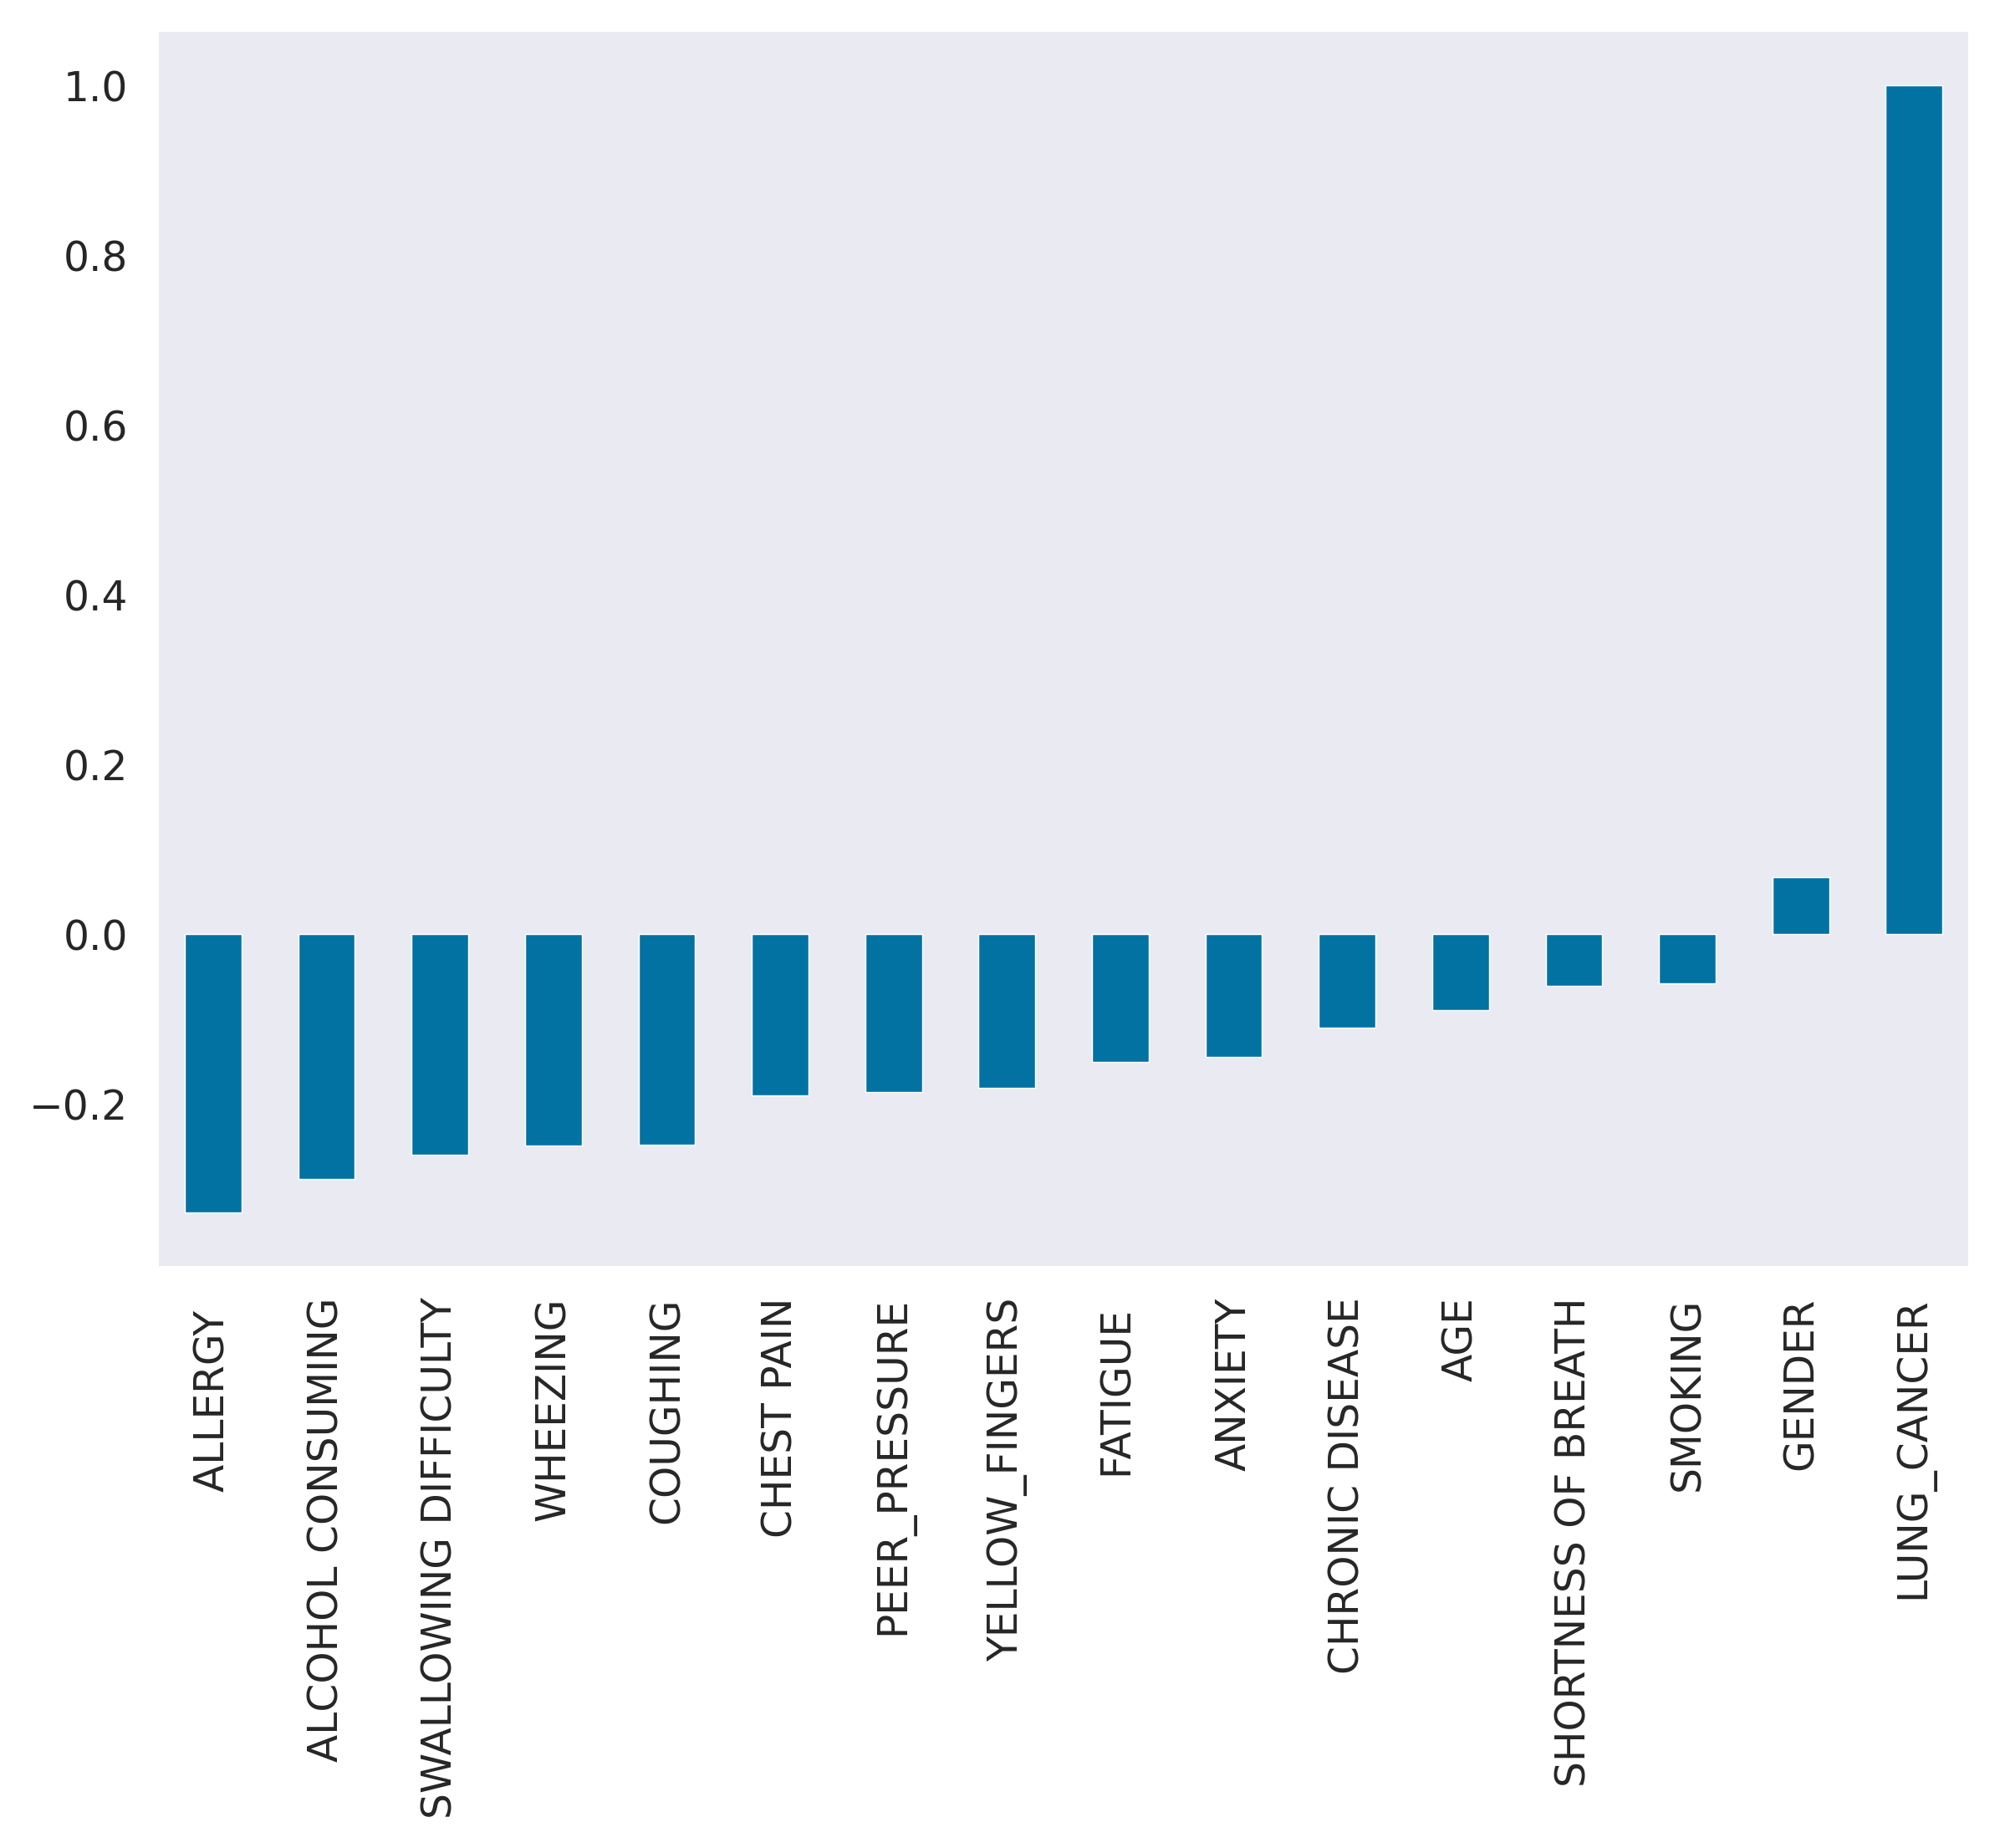

In [12]:
# plot correlation
df.corr()['LUNG_CANCER'].sort_values().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix(for LUNG_CANCER dataset)')

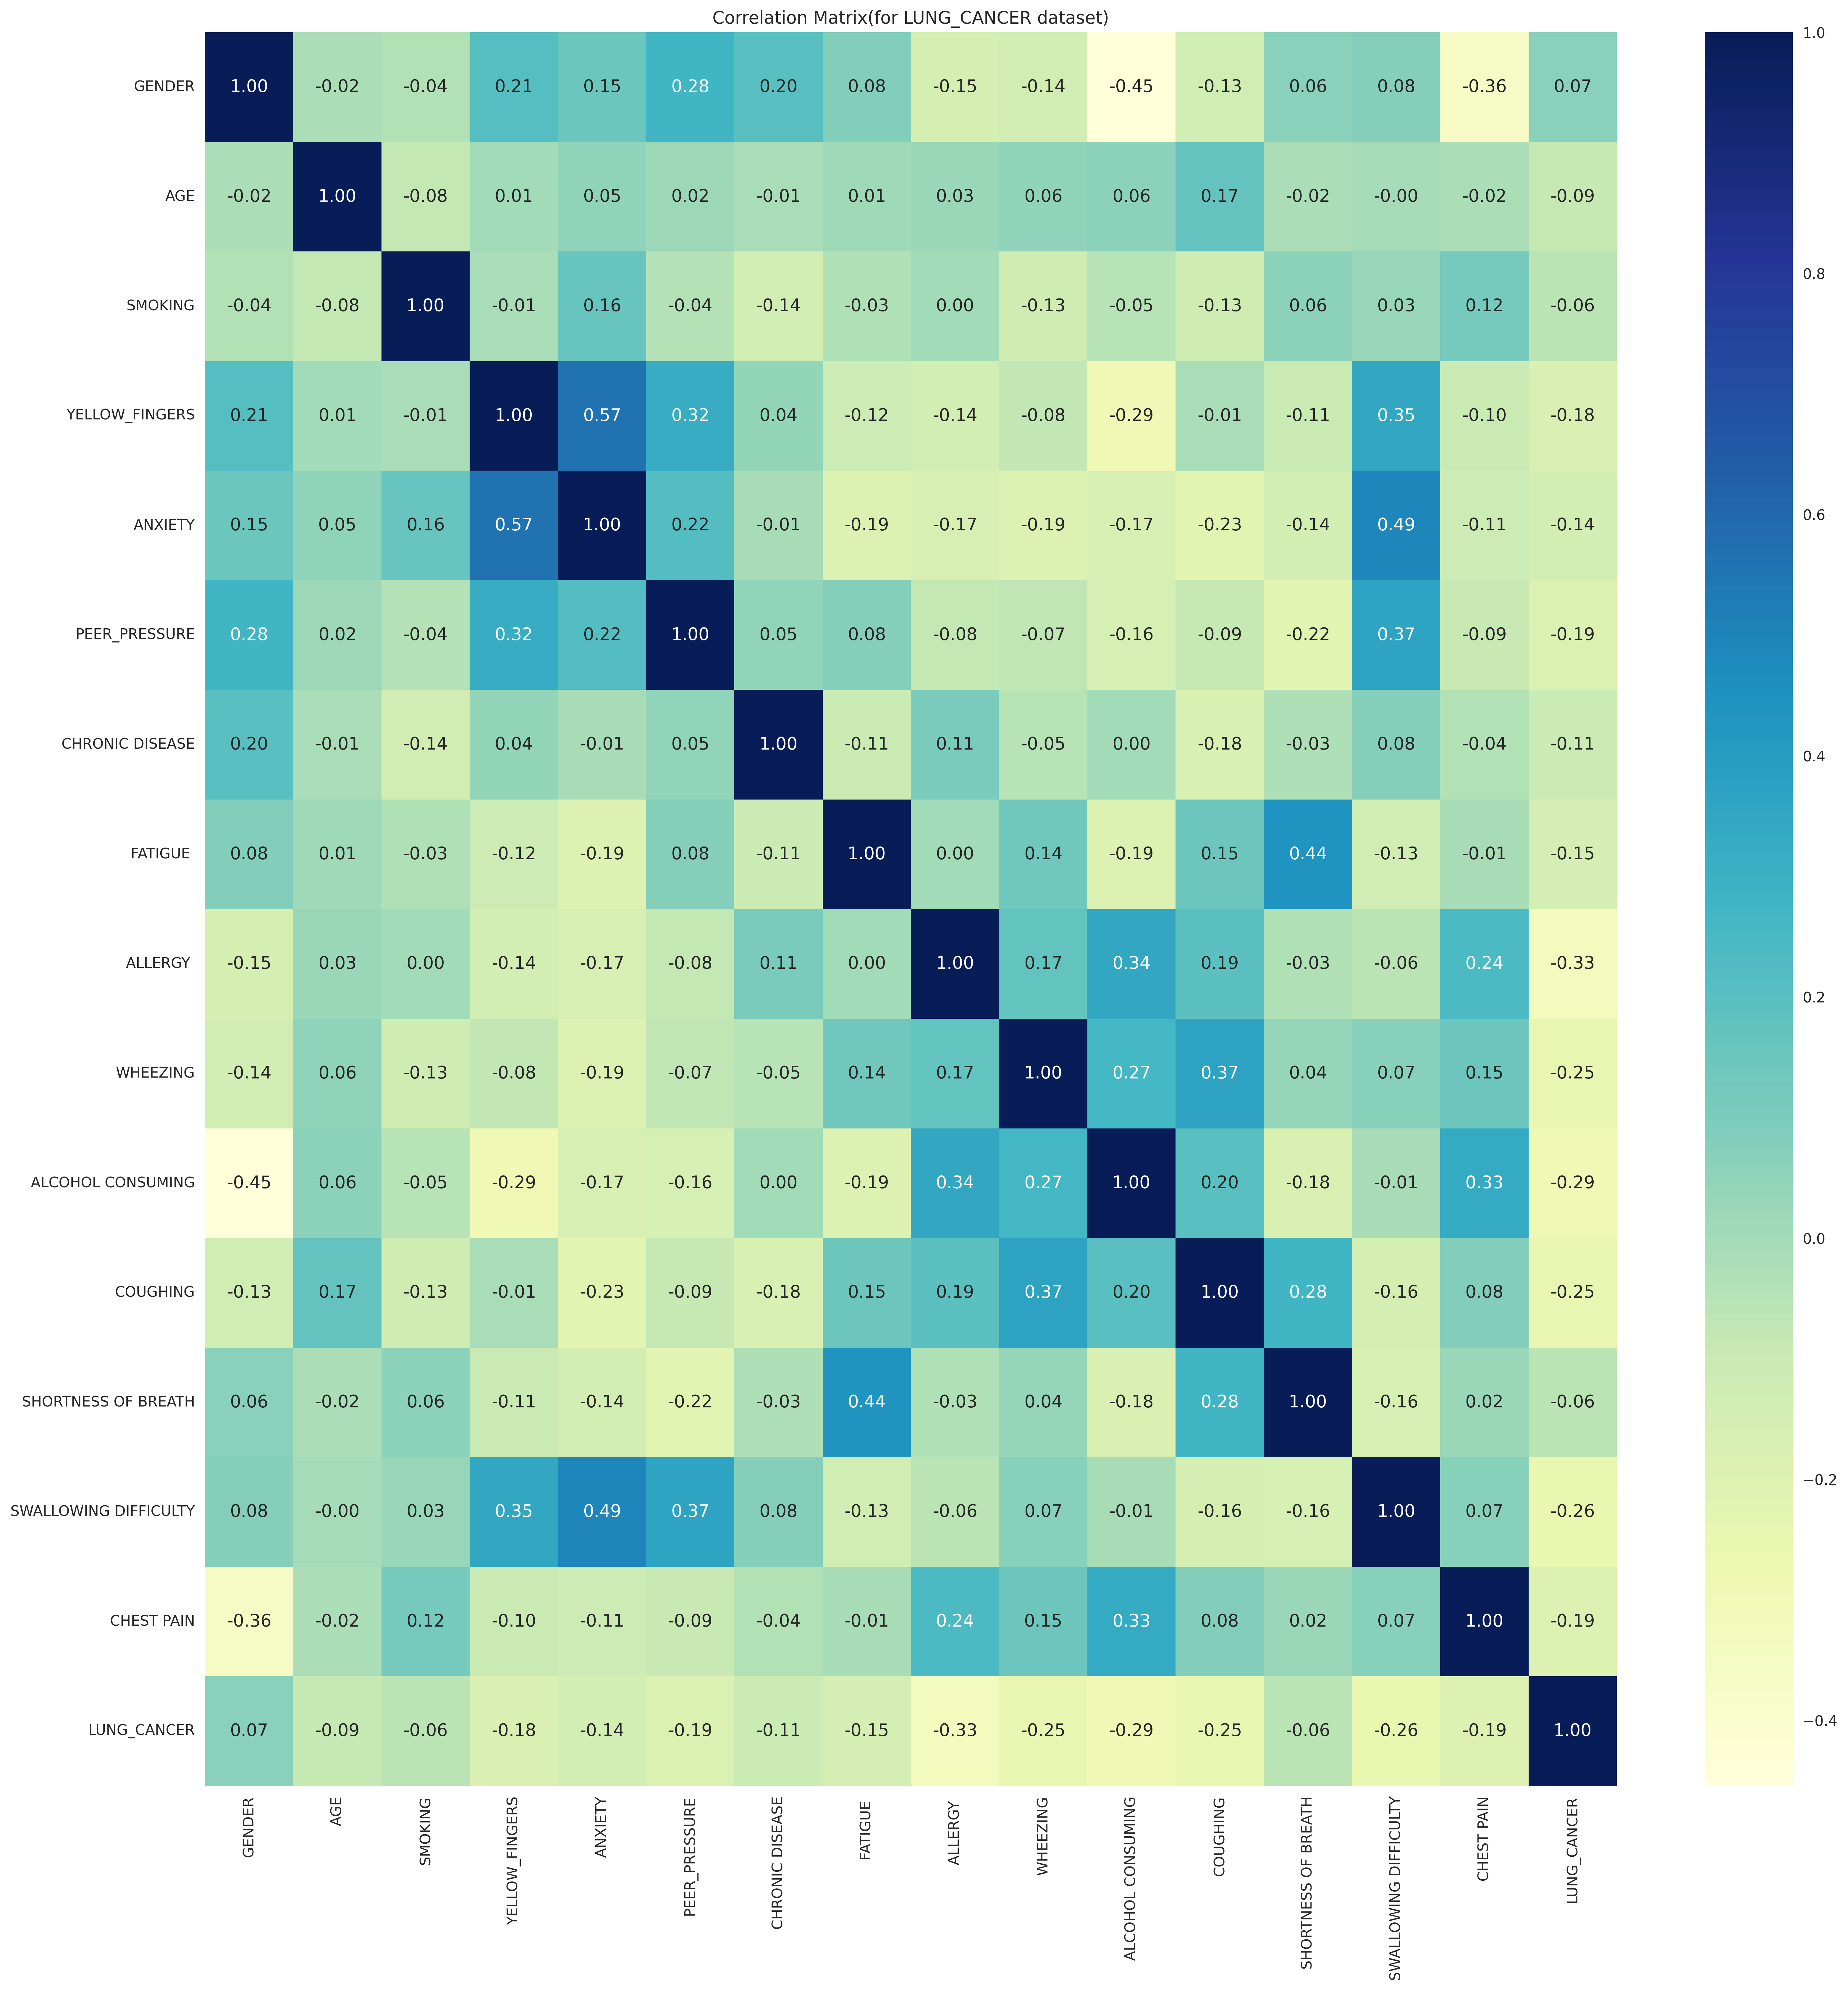

In [13]:
#Correlation for numeric
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu",fmt='.2f')
plt.title("Correlation Matrix(for LUNG_CANCER dataset)")

In [14]:
# check using VIF 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif=df.select_dtypes(exclude="object")

def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "LUNG_CANCER"
print(get_VIF(df_vif,target))


const                    168.669658
GENDER                     1.506218
AGE                        1.056608
SMOKING                    1.136428
YELLOW_FINGERS             1.800066
ANXIETY                    2.026105
PEER_PRESSURE              1.453464
CHRONIC DISEASE            1.176937
FATIGUE                    1.458017
ALLERGY                    1.225014
WHEEZING                   1.343462
ALCOHOL CONSUMING          1.744909
COUGHING                   1.556367
SHORTNESS OF BREATH        1.569471
SWALLOWING DIFFICULTY      1.614791
CHEST PAIN                 1.296585
dtype: float64


In [15]:
df['LUNG_CANCER'].value_counts()

0    270
1     39
Name: LUNG_CANCER, dtype: int64

In [16]:
df['LUNG_CANCER'].value_counts(normalize = True)*100

0    87.378641
1    12.621359
Name: LUNG_CANCER, dtype: float64

In [17]:
# summarize the number of unique values in each column
print(df.nunique())

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64


In [18]:
# locate rows of duplicate data
df.duplicated().any()

True

In [19]:
df.drop_duplicates()
df.shape

(309, 16)

In [20]:
df.shape

(309, 16)

In [21]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(309, 16)

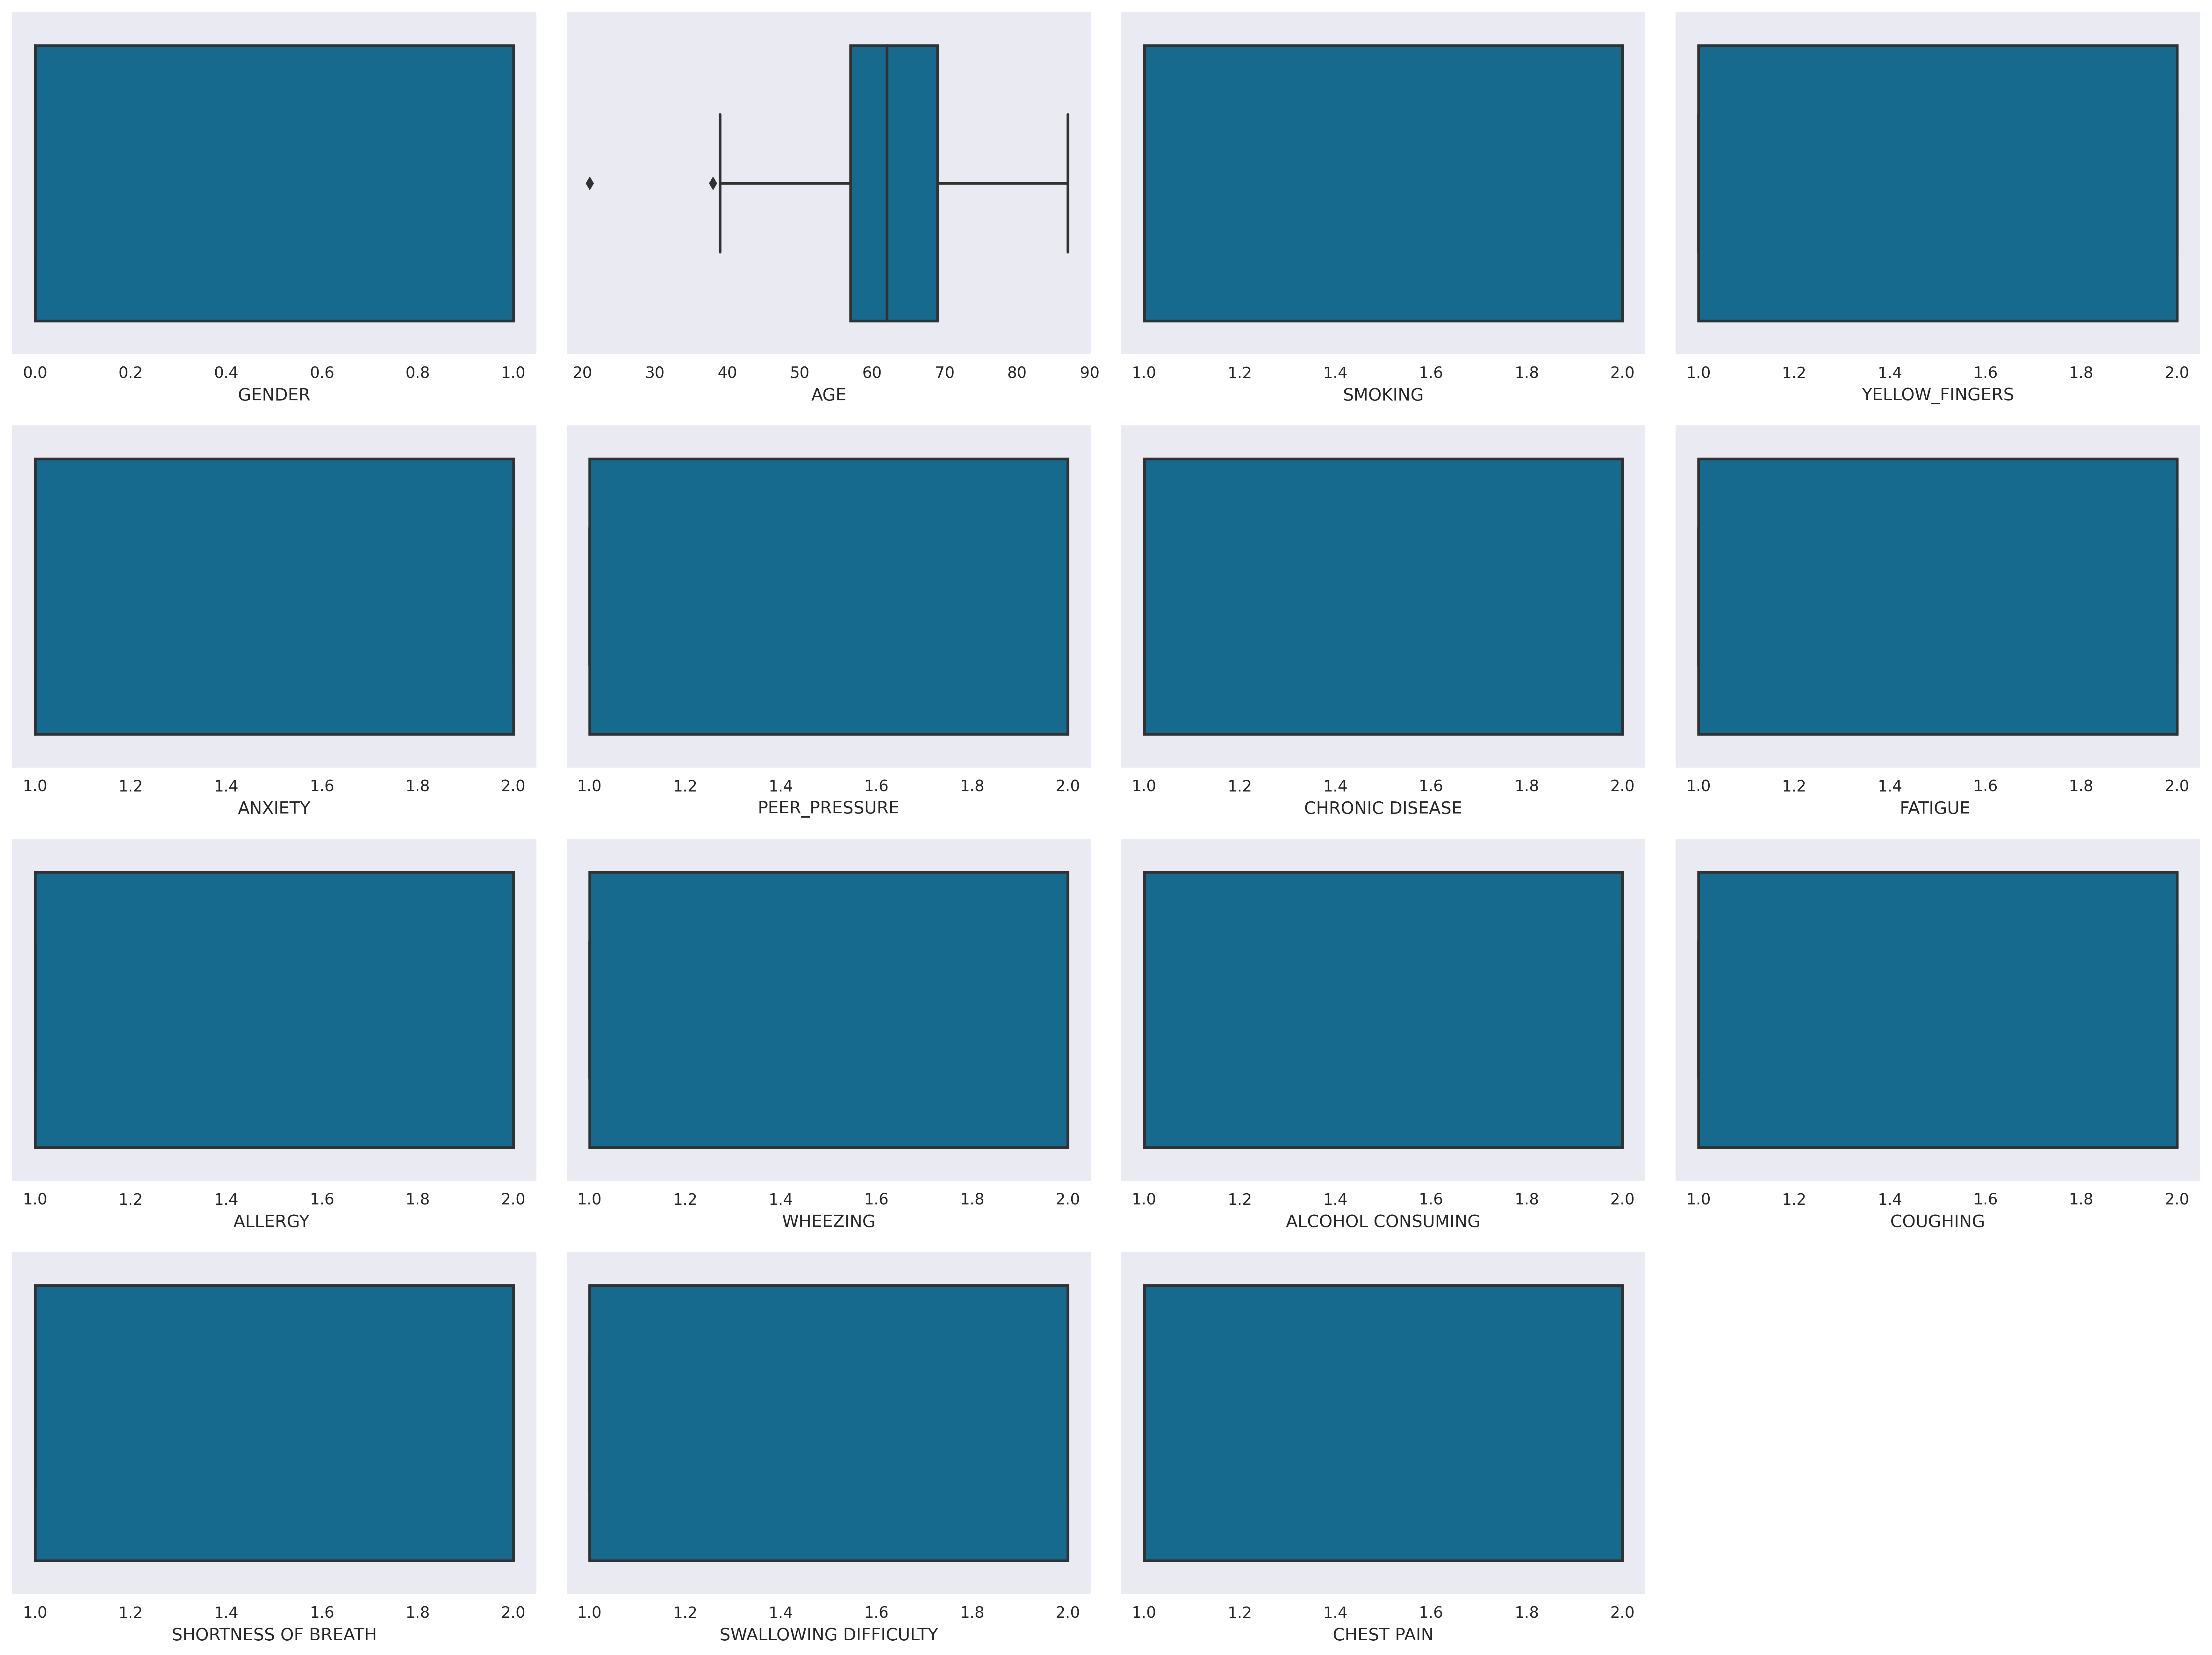

In [22]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 17:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


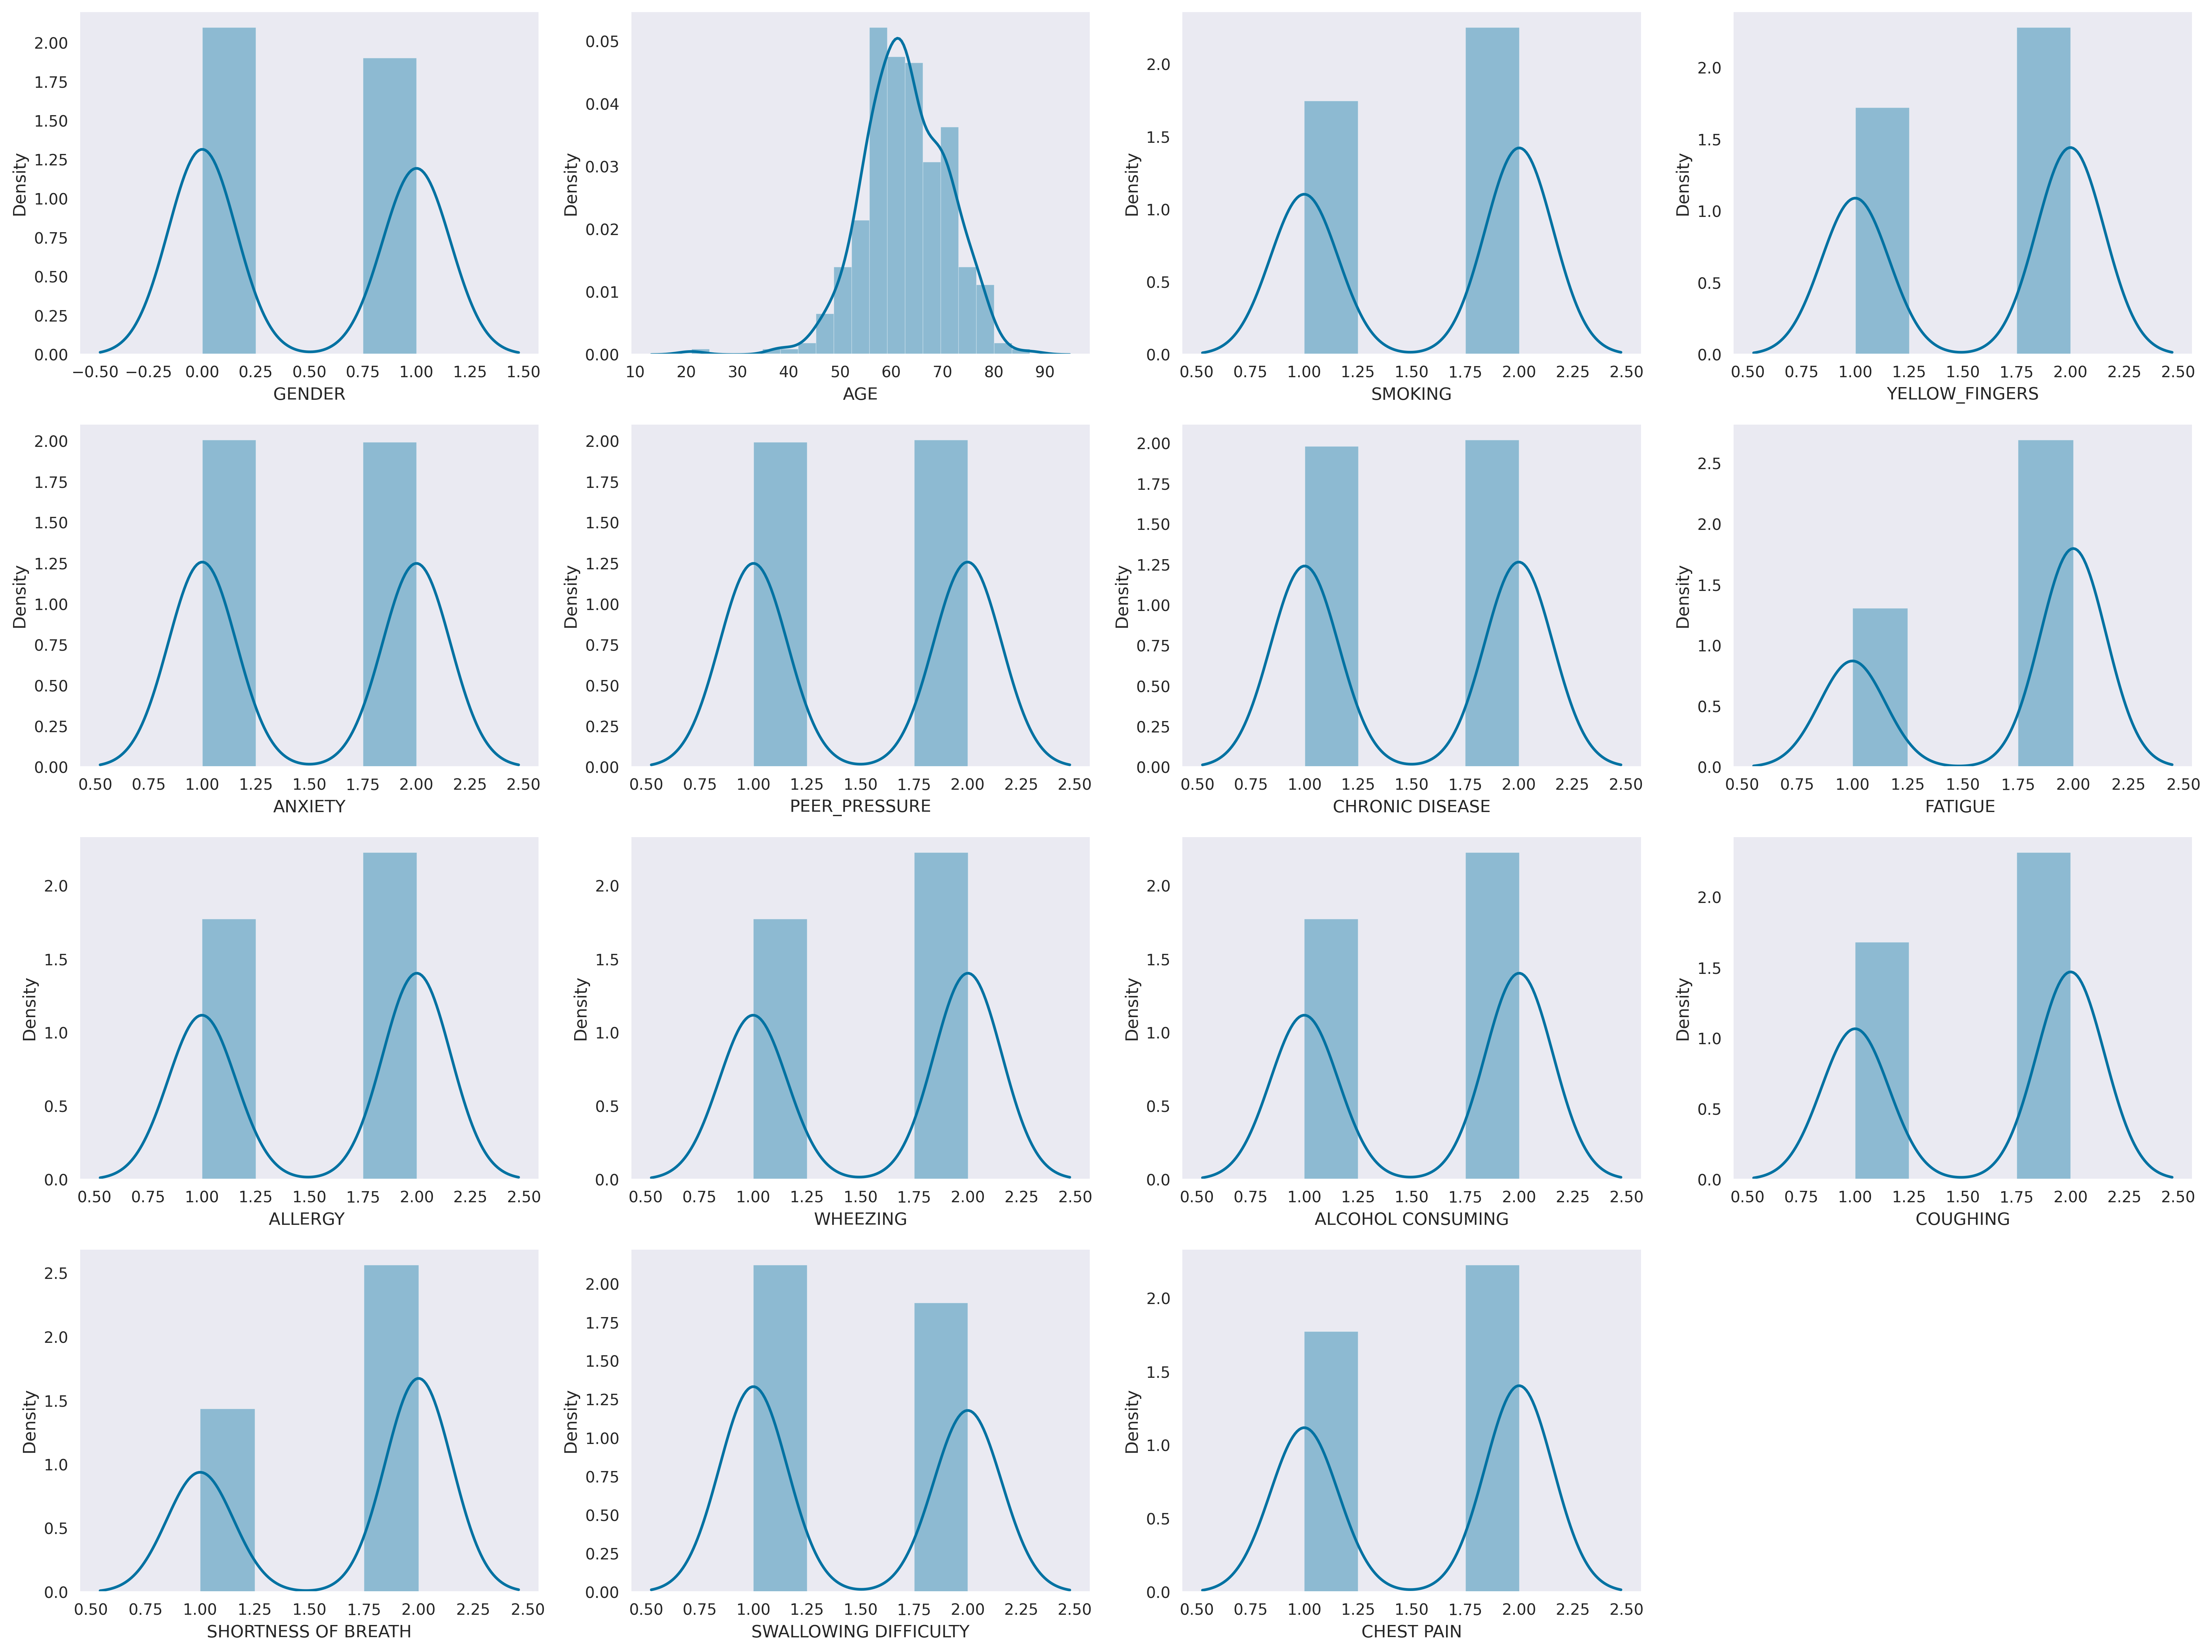

In [23]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 17:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()

# Anomaly

In [24]:
#set up environment final best result
history= setup(df,
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     transformation=True,
                     session_id=123)


In [25]:
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [26]:
lof = create_model('lof')


In [27]:
lof 

LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)

In [28]:
lof_assign = assign_model(lof)
lof_assign

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  Anomaly  Anomaly_Score
0         0   69        1               2        2              1                1         2         1         2                  2         2                    2                      2           2            0        0       1.065019
1         0   74        2               1        1              1                2         2         2         1                  1         1                    2                      2           2            0        1       1.158517
2         1   59        1               1        1              2                1         2         1         2                  1         2                    2                      1           2            1        0       1.073271
3         0   63        2               2        2              1                1         1         1         1                  2         1                    1                      2           2            1        0       1.007775
4         1   63        1               2        1              1                1         1         1         2                  1         2                    2                      1           1            1        0       1.034016
..      ...  ...      ...             ...      ...            ...              ...       ...       ...       ...                ...       ...                  ...                    ...         ...          ...      ...            ...
304       1   56        1               1        1              2                2         2         1         1                  2         2                    2                      2           1            0        0       1.094855
305       0   70        2               1        1              1                1         2         2         2                  2         2                    2                      1           2            0        0       0.987233
306       0   58        2               1        1              1                1         1         2         2                  2         2                    1                      1           2            0        0       1.003400
307       0   67        2               1        2              1                1         2         2         1                  2         2                    2                      1           2            0        0       1.025144
308       0   62        1               1        1              2                1         2         2         2                  2         1                    1                      2           1            0        0       1.039335

[309 rows x 18 columns]

In [29]:
lof_assign[lof_assign['Anomaly'] ==1]

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  Anomaly  Anomaly_Score
1         0   74        2               1        1              1                2         2         2         1                  1         1                    2                      2           2            0        1       1.158517
22        1   21        2               1        1              1                2         2         2         1                  1         1                    2                      1           1            1        1       1.379988
27        0   69        1               1        1              2                1         2         1         2                  1         2                    2                      1           2            1        1       1.157469
31        0   62        2               1        2              1                1         1         2         2                  2         1                    2                      2           2            0        1       1.254856
38        0   56        2               1        1              1                2         1         1         2                  1         1                    2                      1           2            0        1       1.227834
83        1   81        1               1        1              2                2         1         2         1                  2         2                    2                      1           1            0        1       1.164087
94        0   48        2               1        1              1                2         2         2         1                  2         2                    2                      2           2            0        1       1.152656
97        0   59        2               1        1              2                1         1         1         1                  2         2                    2                      1           1            0        1       1.301182
162       1   73        2               1        1              2                1         2         2         2                  2         2                    1                      2           2            0        1       1.159148
169       0   56        2               2        2              2                1         2         2         1                  2         2                    2                      1           2            0        1       1.177565
202       0   74        2               1        1              1                2         2         2         2                  2         1                    1                      2           2            0        1       1.151903
204       0   79        2               1        1              1                2         2         2         1                  2         2                    2                      2           2            0        1       1.151639
238       1   38        1               2        1              1                2         2         2         2                  1         2                    2                      1           2            0        1       1.170575
261       0   39        2               1        1              2                1         2         2         2                  2         1                    2                      1           2            0        1       1.276077
277       1   87        1               1        1              1                2         2         1         1                  1         1                    2                      1           1            1        1       1.204554
281       0   55        2               1        1              1                1         2         2         1                  1         1                    2                      1           2            1        1       1.173912

In [30]:
df = lof_assign[lof_assign['Anomaly'] ==0]
df.drop(columns = ['Anomaly','Anomaly_Score'],inplace = True)
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER
0         0   69        1               2        2              1                1         2         1         2                  2         2                    2                      2           2            0
2         1   59        1               1        1              2                1         2         1         2                  1         2                    2                      1           2            1
3         0   63        2               2        2              1                1         1         1         1                  2         1                    1                      2           2            1
4         1   63        1               2        1              1                1         1         1         2                  1         2                    2                      1           1            1
5         1   75        1               2        1              1                2         2         2         2                  1         2                    2                      1           1            0
..      ...  ...      ...             ...      ...            ...              ...       ...       ...       ...                ...       ...                  ...                    ...         ...          ...
304       1   56        1               1        1              2                2         2         1         1                  2         2                    2                      2           1            0
305       0   70        2               1        1              1                1         2         2         2                  2         2                    2                      1           2            0
306       0   58        2               1        1              1                1         1         2         2                  2         2                    1                      1           2            0
307       0   67        2               1        2              1                1         2         2         1                  2         2                    2                      1           2            0
308       0   62        1               1        1              2                1         2         2         2                  2         1                    1                      2           1            0

[293 rows x 16 columns]

In [31]:
data ,unseen = train_test_split(df,test_size=0.10, random_state=768,stratify = df['LUNG_CANCER'])

In [32]:
data.shape,unseen.shape

((263, 16), (30, 16))

In [33]:
data['LUNG_CANCER'].value_counts()

0    232
1     31
Name: LUNG_CANCER, dtype: int64

In [34]:
data['LUNG_CANCER'].value_counts(normalize=True)*100

0    88.212928
1    11.787072
Name: LUNG_CANCER, dtype: float64

In [35]:
unseen['LUNG_CANCER'].value_counts()

0    26
1     4
Name: LUNG_CANCER, dtype: int64

In [36]:
unseen['LUNG_CANCER'].value_counts(normalize=True)*100

0    86.666667
1    13.333333
Name: LUNG_CANCER, dtype: float64

<b>Pycaret<b/> :  is an open-source,low-code machine learning library in python that
automates machine learning workflows.

it is an end-to-end machine learning and model management tool that exponentially<br>
speeds up the experiment cycle and makes you more productive.<br>
compare with the other open-source machine learning libraries.<br><br><b>Pycaret<b> is an alternate low-code
library that can be used to replace hundreds of lines of code with few lines only.<br>

Pycaret is essentiall a Python wrapper around several machine learning<br> libraries and frameworks,
such as scikit-learn,XGBoost,LightGBM,CatBoost,spaCy,Optuna,Hyperopt,Ray,<br>
and a few more

In [37]:
from pycaret.classification import *

In [61]:
#set up environment
history1 = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fold = 10,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='F2',exclude = ['catboost'])

# Class weight ,Neural Network & ETC

In [68]:
#from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import stochastic_gradient
from sklearn.neural_network import MLPClassifier

In [69]:
#set up environment
history1 = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fold = 10,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)


LOG = LogisticRegression(class_weight= 'balanced',random_state = 42)
DTC = DecisionTreeClassifier(class_weight= 'balanced',random_state = 42)
ETC = ExtraTreesClassifier(class_weight= 'balanced',random_state = 42)
RUS = LGBMClassifier(class_weight= 'balanced',random_state = 42)
RFC = RandomForestClassifier(class_weight= 'balanced',random_state = 42)
HGC = HistGradientBoostingClassifier(random_state = 42)
ETC = ExtraTreesClassifier(class_weight= 'balanced',random_state = 42)
LC = LGBMClassifier(class_weight= 'balanced',random_state = 42)
#RC = RidgeClassifier(class_weight= 'balanced',random_state = 42)
#SGD = SGDClassifier(class_weight='balanced',random_state = 42)
#SGD1 = SGDClassifier(random_state = 42)
#SG = stochastic_gradient(class_weight= 'balanced',random_state = 42)
#MLP = MLPClassifier(random_state = 42)

# train using cross validation
compare_models(include = [LOG,DTC,ETC,RUS,RFC,HGC,ETC,LC],sort='F2')

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Undersampling

In [70]:
REEN = RepeatedEditedNearestNeighbours(sampling_strategy='auto',n_neighbors=3,max_iter=100,kind_sel='all',n_jobs=None,)
TL = TomekLinks(sampling_strategy= 'majority')
RUS = RandomUnderSampler(sampling_strategy= 'majority', random_state = 42)
ENN = EditedNearestNeighbours(sampling_strategy= 'majority')

In [71]:

#set up environment
history_REEN = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=REEN,
                     fold = 10,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#set up environment
history_TL = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=TL,
                     fold = 10,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [73]:
#set up environment
history_RUS = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=RUS,
                     fold = 10,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)

In [74]:
#set up environment
history_ENN = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=ENN,
                     fold = 10,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Oversampling

In [75]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state = 42)
ADA = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=5,n_jobs=None)

In [76]:
#set up environment
history_ROS = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=ROS,
                     fold = 10,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [77]:
#set up environment
history_ADA = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=ADA,
                     fold = 10,
                     session_id=42)
# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# SMOTE

In [78]:
#set up environment
history_smote = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     #fix_imbalance_method=REEN,
                     fold = 10,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Ensemble Algorithms

In [80]:
#set up environment
history_ensemble= setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     #fix_imbalance=True,
                     #fix_imbalance_method=REEN,
                     fold = 10,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

BBC = BalancedBaggingClassifier(sampling_strategy='auto',random_state = 42)
BRF = BalancedRandomForestClassifier(sampling_strategy='auto',random_state = 42)
EEC = EasyEnsembleClassifier(sampling_strategy='auto',random_state = 42)
RUS = RUSBoostClassifier(sampling_strategy='auto',random_state = 42)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

# Oversampling and Undersampling

In [81]:
SMTN = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy= 'majority'))

In [82]:
#set up environment
history_SMTN = setup(data,
                     target='LUNG_CANCER',
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=SMTN,
                     fold = 10,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

# Final Preparation

In [85]:
SMTN = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy= 'majority'))

In [91]:
#set up environment
history_SMTN = setup(data,
                     target='LUNG_CANCER',bin_numeric_features=['AGE'],train_size = 0.75,
                     silent=True,
                     normalize=True,feature_selection=True,feature_selection_method='boruta',
                     polynomial_features=True,
                     fix_imbalance=True,
                     fix_imbalance_method=SMTN,
                     fold = 10,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='F2')

In [103]:
rf = create_model('rf')

In [112]:
tuned_rf = tune_model(rf,
                      n_iter=200,
                      optimize = 'F2',choose_better = True)

In [121]:
bayesian_rf= tune_model(rf,
          search_library = "tune-sklearn",
          search_algorithm = "bayesian",
          n_iter = 50,
          optimize = 'F2')

(raylet) [2022-11-18 13:37:01,261 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3473162240; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 13:37:11,269 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3473125376; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 13:37:21,275 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3473084416; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 13:37:31,284 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3473108992; capacity: 82031734784. Object creation wil

In [122]:
hyperopt_rf = tune_model(rf,
          search_library = "tune-sklearn",
          search_algorithm = "hyperopt",
          n_iter = 50,
          optimize = 'F2')

(raylet) [2022-11-18 13:54:45,208 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3469107200; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 13:54:55,216 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3469139968; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 13:55:05,225 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3469131776; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 13:55:15,233 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3469103104; capacity: 82031734784. Object creation wil

(raylet) [2022-11-18 13:59:55,540 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468763136; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:00:05,549 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468750848; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:00:15,556 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468709888; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:00:25,563 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468689408; capacity: 82031734784. Object creation wil

(raylet) [2022-11-18 14:05:05,823 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468349440; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:05:15,831 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468320768; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:05:25,841 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468296192; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:05:35,850 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3468292096; capacity: 82031734784. Object creation wil

(raylet) [2022-11-18 14:10:16,100 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467923456; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:10:26,108 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467902976; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:10:36,117 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467898880; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:10:46,126 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467894784; capacity: 82031734784. Object creation wil

(raylet) [2022-11-18 14:15:26,366 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467505664; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:15:36,374 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467505664; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:15:46,382 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467505664; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:15:56,391 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467505664; capacity: 82031734784. Object creation wil

(raylet) [2022-11-18 14:20:36,623 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467104256; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:20:46,632 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467100160; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:20:56,641 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467100160; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:21:06,649 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3467083776; capacity: 82031734784. Object creation wil

(raylet) [2022-11-18 14:25:46,897 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3465068544; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:25:56,903 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3465080832; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:26:06,909 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3465064448; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-11-18 14:26:16,915 E 269789 269825] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-11-18_06-21-59_655095_3230 is over 95% full, available space: 3465056256; capacity: 82031734784. Object creation wil

In [110]:
blend_model = blend_models(best,optimize='F2',choose_better=True)

In [111]:
stack_model = stack_models(best,optimize='F2',choose_better=True)

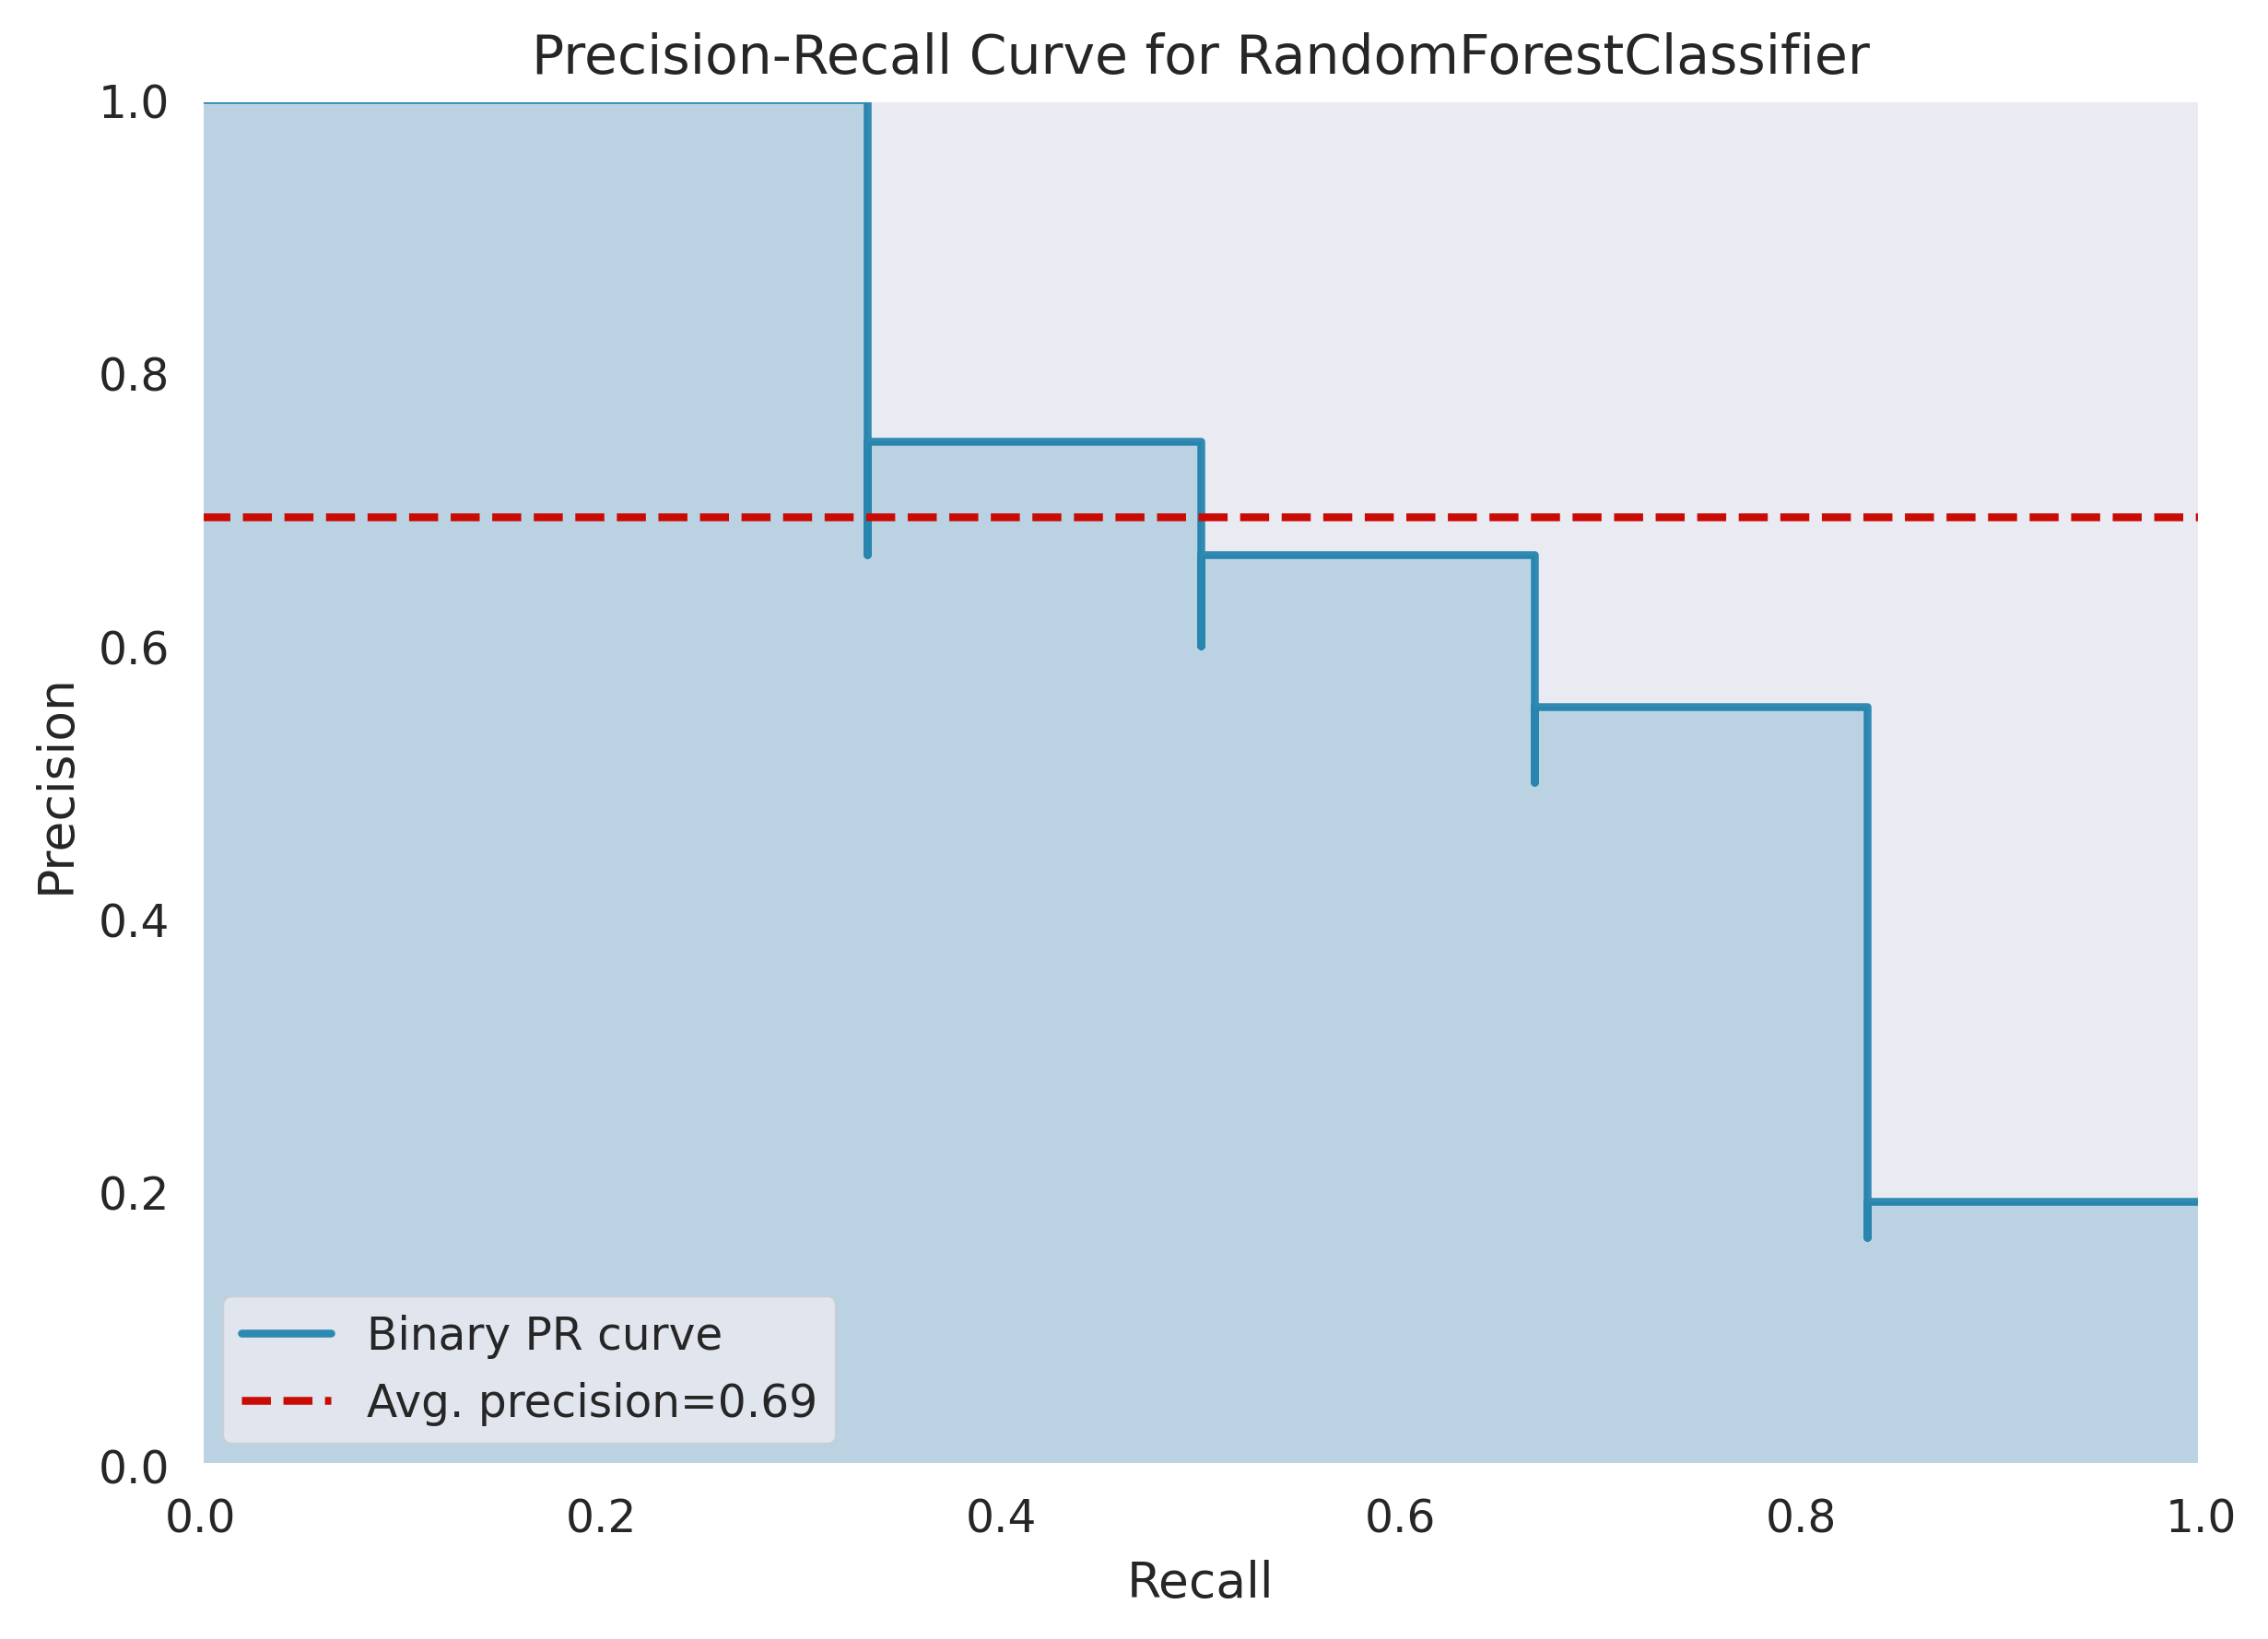

In [113]:
#plot precision-F2
plot_model(tuned_rf,'pr')

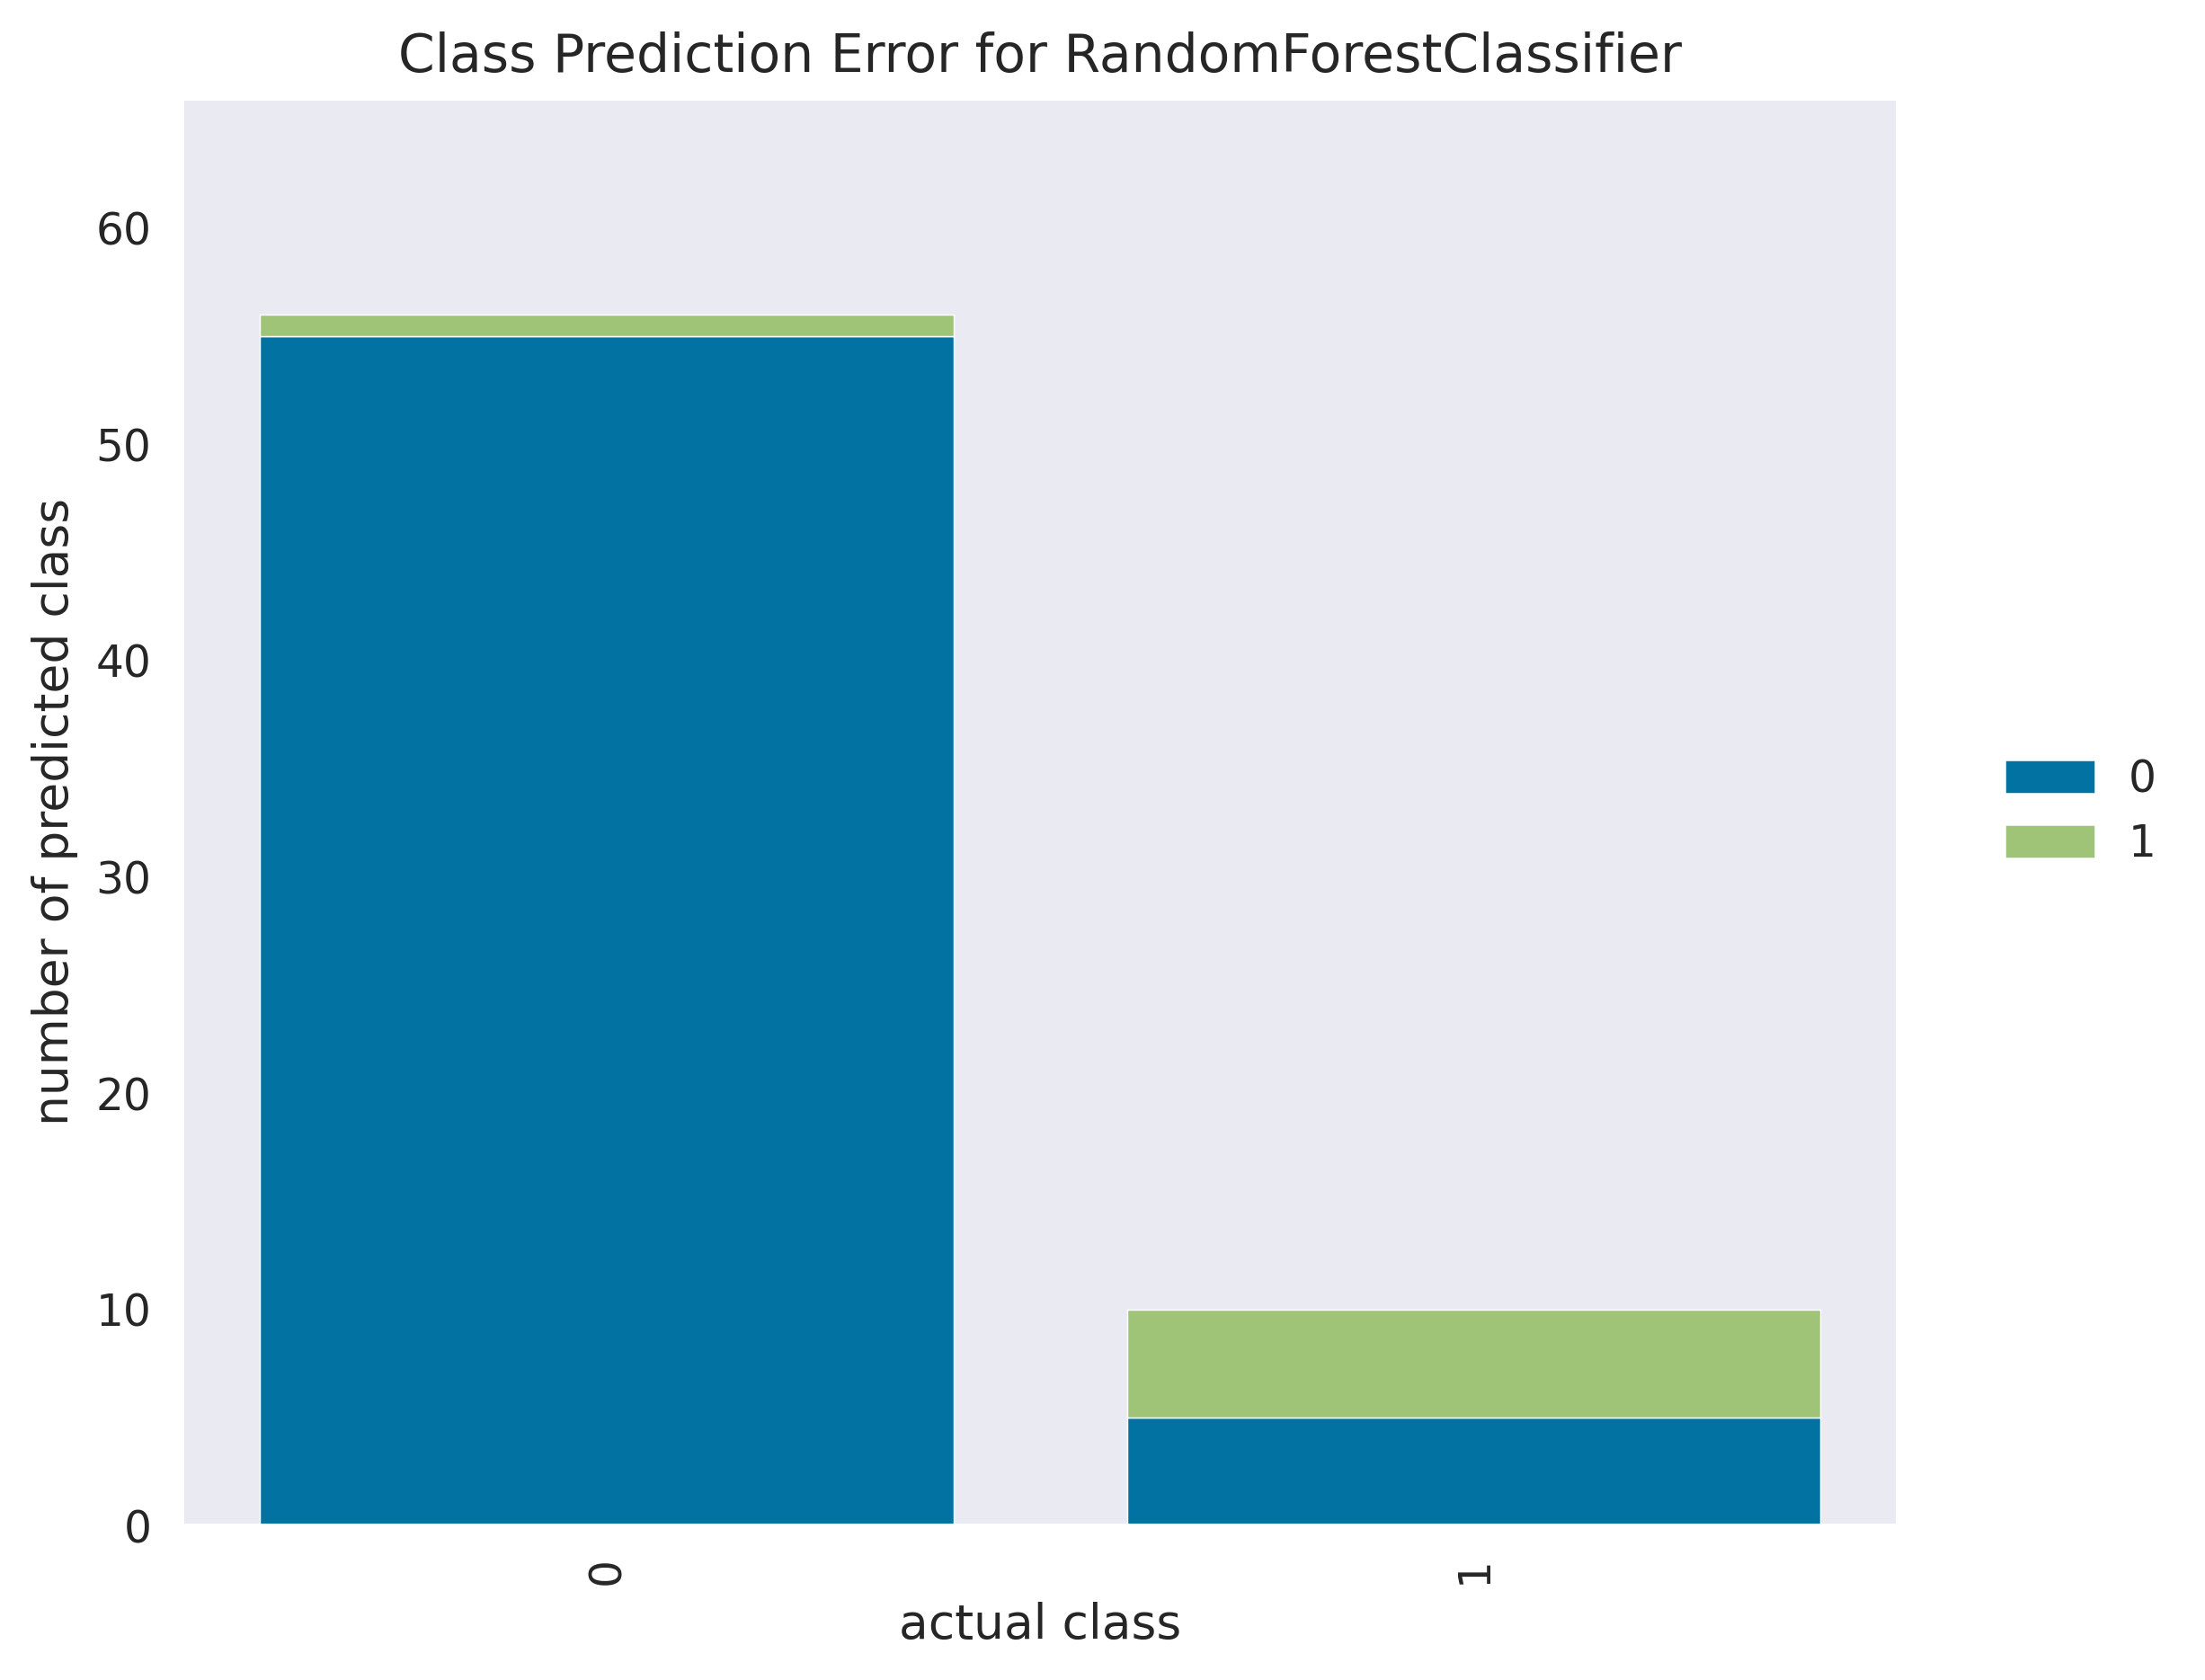

In [114]:
#plot - Class Prediction Error
plot_model(tuned_rf,'error' )

In [115]:
#predict on validation set
pred_holdout = predict_model(tuned_rf)
pred_holdout

AGE_Power2  YELLOW_FINGERS_2  ANXIETY_1  PEER_PRESSURE_2  CHRONIC DISEASE_1  FATIGUE _1  ALLERGY _1  WHEEZING_1  ALCOHOL CONSUMING_1  COUGHING_1  SWALLOWING DIFFICULTY_1  CHEST PAIN_2  LUNG_CANCER  Label   Score
0    -0.018519               1.0        0.0              1.0                0.0         0.0         0.0         0.0                  1.0         0.0                      0.0           1.0            0      0  0.9950
1    -0.827242               0.0        1.0              0.0                0.0         1.0         0.0         1.0                  0.0         0.0                      0.0           1.0            0      0  0.9149
2    -0.158922               1.0        0.0              0.0                0.0         0.0         0.0         0.0                  1.0         1.0                      1.0           0.0            0      0  0.8462
3    -0.566653               1.0        0.0              1.0                0.0         0.0         0.0         0.0                  1.0         0.0                      0.0           0.0            0      0  0.9856
4     1.509068               1.0        0.0              0.0                0.0         1.0         0.0         1.0                  0.0         1.0                      1.0           0.0            0      0  0.6736
..         ...               ...        ...              ...                ...         ...         ...         ...                  ...         ...                      ...           ...          ...    ...     ...
61    1.185579               0.0        1.0              0.0                0.0         0.0         0.0         1.0                  1.0         0.0                      1.0           1.0            0      0  0.7880
62    1.027204               0.0        1.0              1.0                0.0         1.0         0.0         1.0                  0.0         0.0                      1.0           0.0            0      0  0.8503
63   -1.078844               1.0        0.0              1.0                0.0         0.0         1.0         0.0                  1.0         0.0                      0.0           0.0            0      0  0.9511
64   -1.555092               1.0        0.0              1.0                1.0         0.0         1.0         1.0                  1.0         1.0                      0.0           0.0            0      0  0.8352
65    0.269027               1.0        0.0              1.0                1.0         0.0         1.0         0.0                  1.0         0.0                      0.0           0.0            0      0  0.9759

[66 rows x 15 columns]

In [116]:
#finalize
final=finalize_model(tuned_rf)
final

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [117]:
#predict on test set(unseen)
prediction=predict_model(final,data=unseen)
prediction

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  Label   Score
69        1   78        2               2        2              2                1         2         1         2                  1         2                    2                      2           1            0      0  0.9971
39        0   60        2               1        1              1                2         1         2         2                  2         2                    1                      1           2            0      0  0.8782
155       0   75        2               2        2              2                2         1         1         1                  1         1                    1                      1           2            0      0  0.5359
16        0   75        2               1        1              1                2         1         2         2                  2         2                    2                      1           2            0      0  0.8093
279       1   59        1               2        2              2                1         1         2         2                  1         2                    1                      2           1            0      0  0.9418
87        0   62        1               2        2              1                1         2         1         2                  1         1                    1                      2           2            0      0  0.6497
283       0   60        1               2        2              1                1         2         1         2                  2         2                    2                      2           2            0      0  0.9515
175       1   59        2               2        2              2                2         2         1         2                  1         2                    1                      2           2            0      0  0.9692
61        1   60        1               2        2              1                1         1         1         1                  1         2                    1                      1           1            1      1  0.8929
276       1   62        2               2        2              2                2         2         1         1                  1         2                    2                      1           1            0      0  0.6903
292       0   69        1               1        2              1                1         2         1         2                  2         2                    2                      2           1            0      0  0.9570
150       0   67        2               1        2              1                1         2         2         1                  2         2                    2                      1           2            0      0  0.9747
225       0   59        2               1        1              2                2         2         2         2                  2         2                    2                      2           2            0      0  0.9853
164       1   75        1               2        1              2                2         2         2         1                  2         2                    1                      1           1            0      0  0.9724
112       1   68        1               1        1              2                1         2         1         2                  1         2                    2                      1           2            0      1  0.6483
183       1   71        2               1        1              1                2         2         1         1                  1         1                    2                      1           1            1      1  0.8853
206       1   71        2               2        2              1                1         1         2         1                  2         2                    2 

In [118]:
#confusion matrix
print(confusion_matrix(prediction["LUNG_CANCER"],prediction["Label"]))

[[25  1]
 [ 0  4]]


In [119]:
# imbalanced classification report
print(classification_report_imbalanced(prediction["LUNG_CANCER"],prediction["Label"]))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.96      1.00      0.98      0.98      0.96        26
          1       0.80      1.00      0.96      0.89      0.98      0.97         4

avg / total       0.97      0.97      0.99      0.97      0.98      0.96        30



In [120]:
save_model(final,"survey_lung-nov18-2022-tuned_rf")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='LUNG_CANCER', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=11,
                                         max_featu